# Clustering Analysis

In this notebook we want to find out which customer groups exist. For this purpose we use clustering methods.

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

la_2018_set = pd.read_pickle("Data/la_2018_set.pickle")
feature_set = pd.read_pickle("Data/feature_set.pickle")
feature_set_daily = pd.read_pickle("Data/feature_set_daily.pickle")

In [321]:
k_max = 10  # more than 10 clusters are definitely
            # not reasonable!

In [322]:
X=feature_set.drop(columns =["day"], axis=1)

X.head()

,hour,trips,minutes_driven,max_temp,precip,is_weekday
0,0,25.0,738.0,14.4,0.0,1
1,1,24.0,1171.0,14.4,0.0,1
2,2,12.0,232.0,14.4,0.0,1
3,3,3.0,41.0,14.4,0.0,1
4,4,4.0,23.0,14.4,0.0,1


In [323]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head()

,hour,trips,minutes_driven,max_temp,precip,is_weekday
0,-1.723667,-0.394066,-0.268716,-0.897291,-0.126548,0.6334
1,-1.577737,-0.431249,0.184550,-0.897291,-0.126548,0.6334
2,-1.431806,-0.877438,-0.798398,-0.897291,-0.126548,0.6334
3,-1.285876,-1.212080,-0.998338,-0.897291,-0.126548,0.6334
4,-1.139945,-1.174898,-1.017180,-0.897291,-0.126548,0.6334


In [324]:
features_scaled = X_scaled_df
features_scaled.head()

,hour,trips,minutes_driven,max_temp,precip,is_weekday
0,-1.723667,-0.394066,-0.268716,-0.897291,-0.126548,0.6334
1,-1.577737,-0.431249,0.184550,-0.897291,-0.126548,0.6334
2,-1.431806,-0.877438,-0.798398,-0.897291,-0.126548,0.6334
3,-1.285876,-1.212080,-0.998338,-0.897291,-0.126548,0.6334
4,-1.139945,-1.174898,-1.017180,-0.897291,-0.126548,0.6334


In [325]:
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)

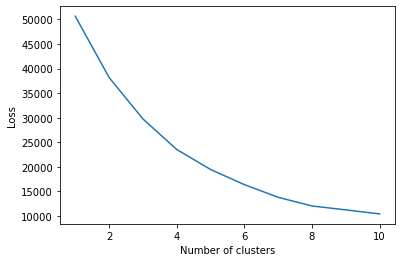

In [326]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 6.0)

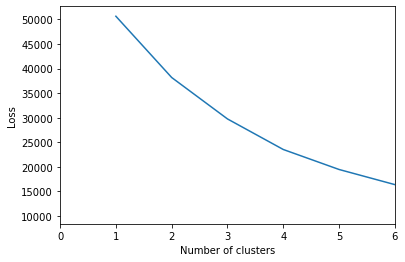

In [327]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [328]:
# refit algorithm
two_means = KMeans(n_clusters=2)
two_means.fit(X_scaled)

# match records to clusters by calling predict
two_means.predict(X_scaled)

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

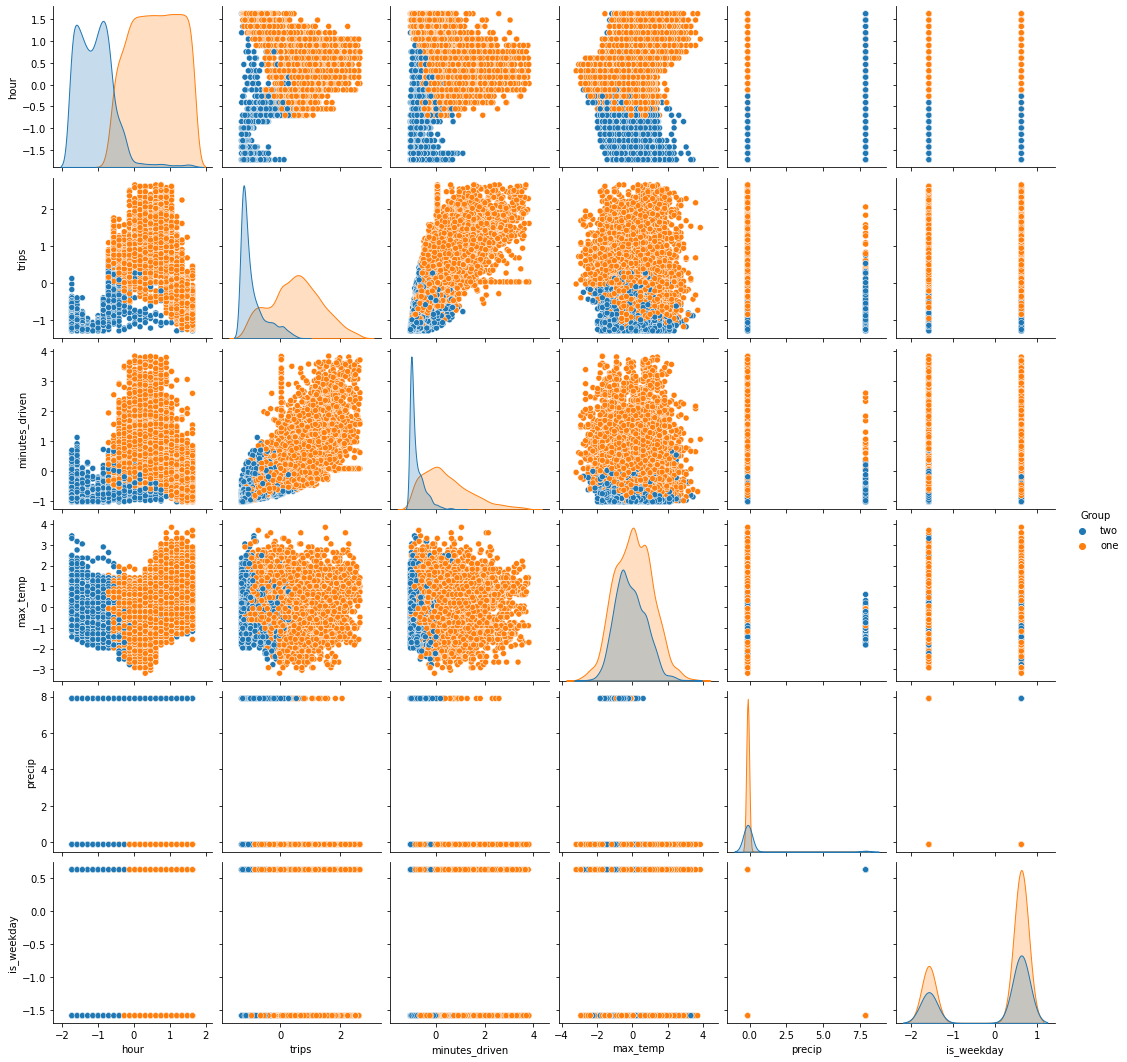

In [329]:
numbers = [ "one", "two", "three"]

features_scaled["Group"] = two_means.predict(X_scaled)
features_scaled["Group"] = features_scaled["Group"].apply(lambda x: numbers[x])
sns.pairplot(data=features_scaled, hue="Group")

We can see that the distinguishing of the bike company between a walk-up user and a Monthly-pass user makes sense. We observe two customer groups. Group one takes shorter and fewer trips (walk-up user) and group two takes longer and more trips (Monthly-pass). 

In [344]:
la_2018_set.head()

,start_time,end_time,start_station,end_station,bike_id,user_type,hour,week_day,day,month,trip_id,duration,start_coordinates,end_coordinates,distance,km/h,bike_type
0,2018-01-01 00:04:00,2018-01-01 00:25:00,3063,3018,5889,Walk-up,0,0,01/01/2018,1,65406367,21,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.6,standard
1,2018-01-01 00:05:00,2018-01-01 00:25:00,3063,3018,6311,Walk-up,0,0,01/01/2018,1,65406366,20,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.7,standard
2,2018-01-01 00:06:00,2018-01-01 00:25:00,3063,3018,5753,Walk-up,0,0,01/01/2018,1,65406365,19,"(34.0492, -118.2528)","(34.0437, -118.2601)",0.91,2.9,standard
3,2018-01-01 00:13:00,2018-01-01 00:35:00,3018,3031,6220,Monthly Pass,0,0,01/01/2018,1,65406364,22,"(34.0437, -118.2601)","(34.0447, -118.2524)",0.72,2.0,standard
4,2018-01-01 00:14:00,2018-01-01 00:59:00,4204,4216,12436,Monthly Pass,0,0,01/01/2018,1,65406362,45,"(33.9884, -118.4516)","(34.0234, -118.4796)",4.67,6.2,standard


## For each Datapoint 

In [331]:
#la_2018_set.drop(columns =["day"], axis=1)
hour_set= pd.DataFrame()
hour_set["hour"]= la_2018_set["hour"]
hour_set["duration"]= la_2018_set["duration"]
hour_set["station"]= la_2018_set["start_station"]
hour_set.head()

,hour,duration,station
0,0,21,3063
1,0,20,3063
2,0,19,3063
3,0,22,3018
4,0,45,4204


In [332]:
transf= pd.DataFrame()
transf["station"]=hour_set["station"]
transf["hour"]=hour_set["hour"]
transf.head()
transf=pd.DataFrame(transf.groupby(["station"]).sum())
transf= transf.reset_index()
transf["index"]= list(range(132))
transf=transf.drop(columns =["hour"], axis=1)
transf.head()

,station,index
0,3000,0
1,3005,1
2,3006,2
3,3007,3
4,3008,4


In [333]:
feature_set = pd.DataFrame(hour_set.join(transf.set_index ("station"), on="station", how="left"))
feature_set=feature_set.drop(columns =["station"], axis=1)
feature_set.head()

,hour,duration,index
0,0,21,45
1,0,20,45
2,0,19,45
3,0,22,10
4,0,45,105


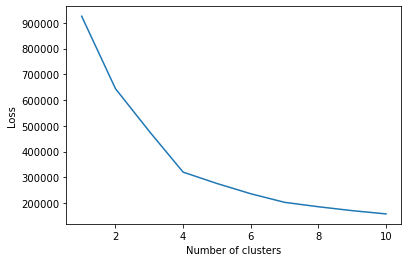

(0.0, 6.0)

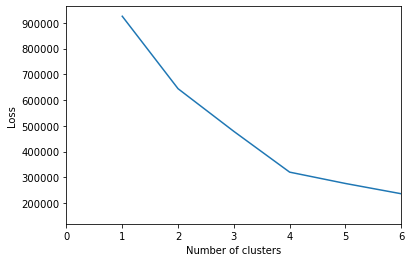

In [334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_set)
X_scaled = scaler.transform(feature_set)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_set.columns, index=feature_set.index)
X_scaled_df.head()

k_max=10
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [335]:
# refit algorithm
two_means = KMeans(n_clusters=4)
two_means.fit(X_scaled)

# match records to clusters by calling predict
two_means.predict(X_scaled)

array([0, 0, 0, ..., 3, 2, 2], dtype=int32)

In [336]:
feature_set.head()

,hour,duration,index
0,0,21,45
1,0,20,45
2,0,19,45
3,0,22,10
4,0,45,105


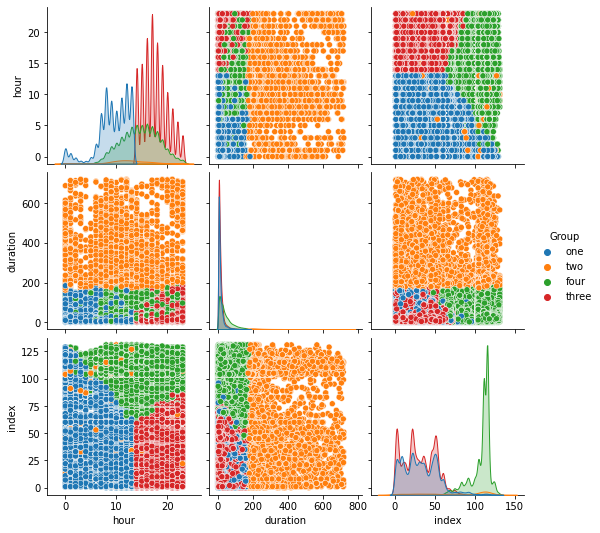

In [337]:
numbers = [ "one", "two", "three", "four"]

feature_set["Group"] = two_means.predict(X_scaled)
feature_set["Group"] = feature_set["Group"].apply(lambda x: numbers[x])
sns.pairplot(data=feature_set, hue="Group")


## Summed per Hour

In [338]:
feature_set= pd.DataFrame(feature_set.groupby(["index","hour"])["duration"].sum())
feature_set = feature_set.reset_index()
feature_set["index"] = feature_set["index"]
feature_set.head()
#plt.plot(hour_set["station"], hour_set["duration"])

,index,hour,duration
0,0,8,39
1,0,9,679
2,0,10,2428
3,0,11,4868
4,0,12,1682


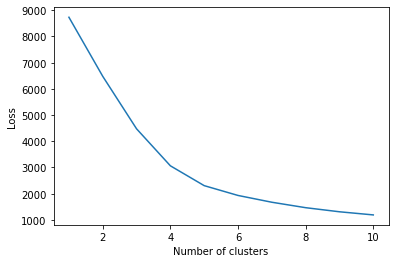

(0.0, 6.0)

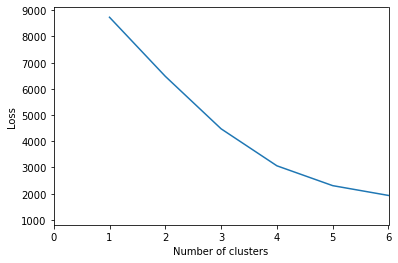

In [339]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature_set)
X_scaled = scaler.transform(feature_set)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_set.columns, index=feature_set.index)
X_scaled_df.head()

k_max=10
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(X_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,6])

In [340]:
# refit algorithm
two_means = KMeans(n_clusters=4)
two_means.fit(X_scaled)

# match records to clusters by calling predict
two_means.predict(X_scaled)

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

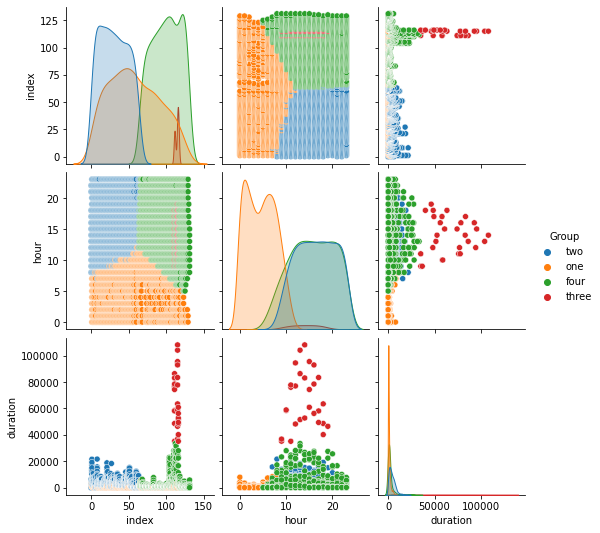

In [341]:
numbers = [ "one", "two", "three", "four"]

feature_set["Group"] = two_means.predict(X_scaled)
feature_set["Group"] = feature_set["Group"].apply(lambda x: numbers[x])
sns.pairplot(data=feature_set, hue="Group")

In [345]:
feature_set.head()

,index,hour,duration,Group
0,0,8,39,two
1,0,9,679,two
2,0,10,2428,two
3,0,11,4868,two
4,0,12,1682,two
